Data Wrangling

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [3]:
movies = pd.read_csv('tmdb-movies.csv')

movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Data Cleaning

In [6]:
clean_movies = movies.dropna(axis=0, how='any')

In [7]:
clean_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date          199

In [8]:
column_drop = ['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'release_year', 'vote_count', 'budget_adj', 'revenue_adj', 'revenue']
clean_movies = clean_movies.drop(column_drop, axis=1)

In [9]:
clean_movies.head()

,id,popularity,budget,original_title,vote_average
0,135397,32.985763,150000000,Jurassic World,6.5
1,76341,28.419936,150000000,Mad Max: Fury Road,7.1
2,262500,13.112507,110000000,Insurgent,6.3
3,140607,11.173104,200000000,Star Wars: The Force Awakens,7.5
4,168259,9.335014,190000000,Furious 7,7.3


In [10]:
clean_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 0 to 10819
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1992 non-null   int64  
 1   popularity      1992 non-null   float64
 2   budget          1992 non-null   int64  
 3   original_title  1992 non-null   object 
 4   vote_average    1992 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 93.4+ KB


Data Analysis

Text(0, 0.5, 'Frequency')

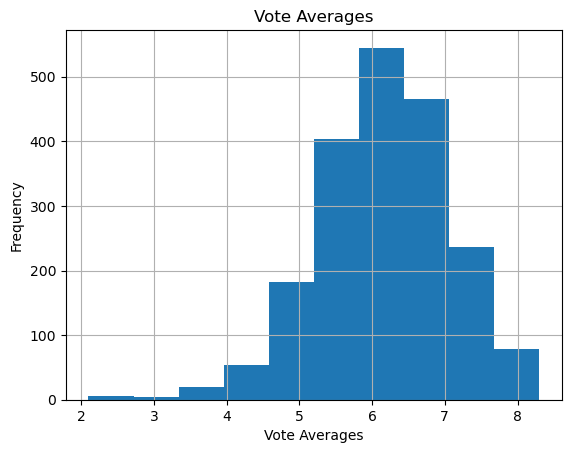

In [12]:
clean_movies['vote_average'].hist()
plt.title('Vote Averages')
plt.xlabel('Vote Averages')
plt.ylabel('Frequency')

In [13]:
clean_movies['vote_average'].describe()

count    1992.000000
mean        6.178614
std         0.881955
min         2.100000
25%         5.600000
50%         6.200000
75%         6.800000
max         8.300000
Name: vote_average, dtype: float64

In [14]:
clean_movies['budget'].describe()

count    1.992000e+03
mean     3.454924e+07
std      5.061878e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.500000e+07
75%      4.800000e+07
max      4.250000e+08
Name: budget, dtype: float64

Text(0, 0.5, 'Frequency')

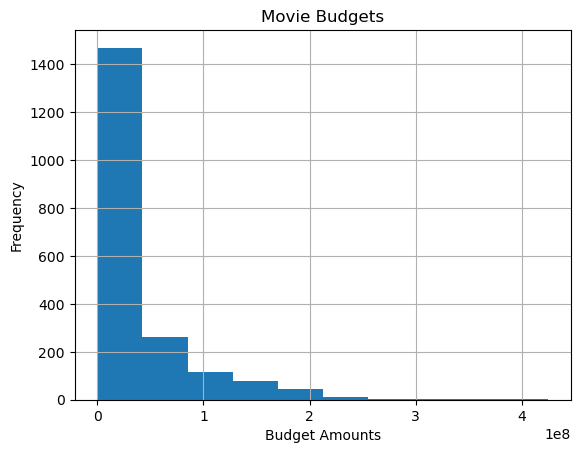

In [15]:
clean_movies['budget'].hist()
plt.title('Movie Budgets')
plt.xlabel('Budget Amounts')
plt.ylabel('Frequency')

Is there a correlation between a movie's budget and its popularity?

Text(0, 0.5, 'Budgets')

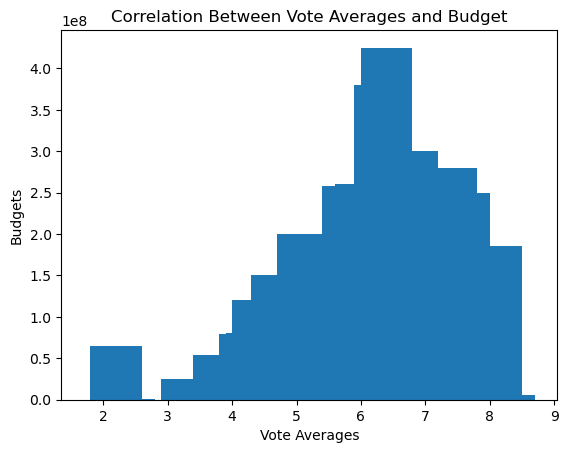

In [17]:
plt.bar(clean_movies['vote_average'], clean_movies['budget'])
plt.title('Correlation Between Vote Averages and Budget')
plt.xlabel('Vote Averages')
plt.ylabel('Budgets')

Which movies were the highest rated and what were their budgets?

In [19]:
vote_mean = clean_movies.groupby(['vote_average', 'original_title', 'budget'])['vote_average'].mean()
print(vote_mean)

vote_average  original_title                      budget   
2.1           Superbabies: Baby Geniuses 2        0            2.1
2.2           Foodfight!                          65000000     2.2
2.4           Jersey Shore Massacre               1400000      2.4
              Mega Shark vs. Crocosaurus          0            2.4
2.5           All About Anna                      0            2.5
                                                              ... 
8.1           Kill Bill: The Whole Bloody Affair  30000000     8.1
              Schindler's List                    22000000     8.1
              The Dark Knight                     185000000    8.1
8.2           Whiplash                            3300000      8.2
8.3           The Godfather                       6000000      8.3
Name: vote_average, Length: 1992, dtype: float64


Text(0, 0.5, 'Voting Averages')

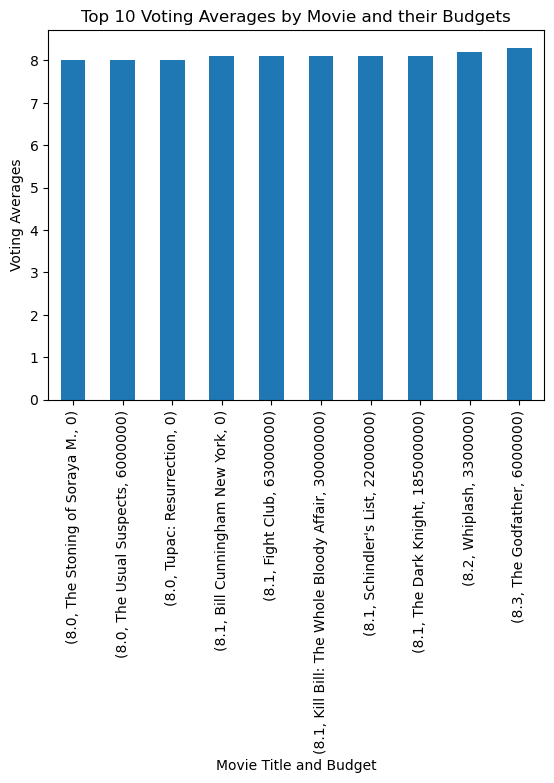

In [20]:
vote_mean.tail(10).plot(kind='bar')
plt.title('Top 10 Voting Averages by Movie and their Budgets')
plt.xlabel('Movie Title and Budget')
plt.ylabel('Voting Averages')

In [21]:
clean_movies['id'].nunique()

1992

In [22]:
clean_movies['vote_average'].mean()

6.178614457831325

In [23]:
clean_movies['budget'].mean()

34549235.94076305

In [24]:
import statsmodels.api as sm

clean_movies['intercept'] = 1

clean_movies['group'] = clean_movies['budget'].apply(lambda x: 1 if x >= 35000000 else 0)

clean_movies['high votes'] = clean_movies['vote_average'].apply(lambda x: 1 if x >= 7 else 0)

print(clean_movies.head())

       id  popularity     budget                original_title  vote_average  \
0  135397   32.985763  150000000                Jurassic World           6.5   
1   76341   28.419936  150000000            Mad Max: Fury Road           7.1   
2  262500   13.112507  110000000                     Insurgent           6.3   
3  140607   11.173104  200000000  Star Wars: The Force Awakens           7.5   
4  168259    9.335014  190000000                     Furious 7           7.3   

   intercept  group  high votes  
0          1      1           0  
1          1      1           1  
2          1      1           0  
3          1      1           1  
4          1      1           1  


In [25]:
logit_mod = sm.Logit(clean_movies['high votes'], clean_movies[['intercept', 'group']])
results=logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.485814
         Iterations 5


In [26]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Method:           MLE      
Dependent Variable: high votes       Pseudo R-squared: 0.000    
Date:               2025-04-27 22:36 AIC:              1939.4834
No. Observations:   1992             BIC:              1950.6771
Df Model:           1                Log-Likelihood:   -967.74  
Df Residuals:       1990             LL-Null:          -967.86  
Converged:          1.0000           LLR p-value:      0.62698  
No. Iterations:     5.0000           Scale:            1.0000   
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
intercept   -1.4709    0.0699  -21.0563  0.0000  -1.6078  -1.3340
group        0.0591    0.1215    0.4870  0.6263  -0.1789   0.2972
================================================================

"""